# Standardization versus Normalization

Standardization and normalization are two techniques used to scale features in data preprocessing, each suited to different scenarios and objectives:

**Standardization** (StandardScaler) involves rescaling the features such that they have a mean of 0 and a standard deviation of 1. The process transforms each feature to have approximately the same scale but does not bound them to a specific range. This is useful when the algorithm assumes that the data is normally distributed. Standardization is commonly applied in scenarios where the data follows a Gaussian distribution or when algorithms sensitive to the scale of data.

**Normalization** (MinMaxScaler) scales the features to lie between a given minimum and maximum value, often between 0 and 1, without assuming any specific distribution of the features. Normalization is useful when you do not assume the distribution of your data or when you know the data does not follow a Gaussian distribution. It is also beneficial when you need to bound values, ensuring that outliers have less influence. 

```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler

model = StandardScaler() 

# or
# model = MinMaxScaler() 


X_scaled = model.fit_transform(X)
```

### How data is scaled or transformed

Standardization: Each data point x is mapped to ${(x - \mu) \over \sigma}$

Normalization: Each data point x is mapped to ${(x - xmin) \over (xmax - xmin)}$

In [1]:
import pandas
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()
ms = MinMaxScaler()
data = pandas.read_csv('../Datasets/iris.csv').drop(columns=['Species'])
data.sample()

,SepalLength,SepalWidth,PetalLength,PetalWidth
88,5.6,3.0,4.1,1.3


In [2]:
d1 = ss.fit_transform(data)
d2 = ms.fit_transform(data)

In [7]:
d1.shape, d2.shape, data.shape

((150, 4), (150, 4), (150, 4))

In [12]:
# data[[data.columns[0]]]
print(d1[0:10])
d1[:, 0][0:10]  # all rows of first column

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904,
       -0.53717756, -1.50652052, -1.02184904, -1.74885626, -1.14301691])

In [13]:
d1[0:5, 0]  # first 5 rows of first column

array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904])

In [17]:
import warnings
warnings.filterwarnings('ignore')

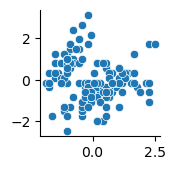

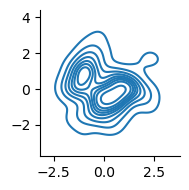

In [23]:
import seaborn
seaborn.relplot(x=d1[:, 0], y=d1[:,1], 
                # hue=pandas.read_csv('../Datasets/iris.csv')['Species'],
                height=2)
seaborn.displot(x=d1[:, 0], y=d1[:,1], 
                kind='kde',
                # hue=pandas.read_csv('../Datasets/iris.csv')['Species'],
                height=2)

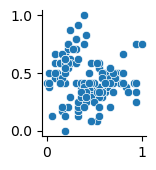

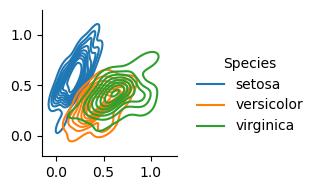

In [25]:
seaborn.relplot(x=d2[:, 0], y=d2[:,1], 
                # hue=pandas.read_csv('../Datasets/iris.csv')['Species'],
                height=2)
seaborn.displot(x=d2[:, 0], y=d2[:,1], 
                kind='kde',
                hue=pandas.read_csv('../Datasets/iris.csv')['Species'],
                height=2)

---
### An example

* Two features X1 and X2
* Two data points: A = (100, 1),  B = (120, 2)
* X1 has $\mu = 110$, $\sigma = 10$.
* X2 has $\mu = 1.5$, $\sigma = 0.5$.
* Assuming the ranges of X1 is [100,120] and X2 is [1,2]

Note: A and B are the extreme points in the dataset.


In [29]:
import math

def rms(a, b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def normalize(x, xmin, xmax):
    return (x-xmin)/(xmax-xmin)

def standardize(x, mean, sigma):
    return (x-mean)/sigma

In [30]:
A = (100,1)
B = (120,2)
rms(A,B)

20.024984394500787

Observation: differences in X2  are dominated by differences in X1.

In [32]:


An = normalize(A[0], 100, 120), normalize(A[1], 1, 2)
Bn = normalize(B[0], 100, 120), normalize(B[1], 1, 2)

print('transformed data:', An, Bn, 'distance', rms(An, Bn))

As = standardize(A[0], 110, 10), standardize(A[1], 1.5, 0.5)
Bs = standardize(B[0], 110, 10), standardize(B[1], 1.5, 0.5)

print('transformed data:', As, Bs, 'distance', rms(As, Bs))


transformed data: (0.0, 0.0) (1.0, 1.0) distance 1.4142135623730951
transformed data: (-1.0, -1.0) (1.0, 1.0) distance 2.8284271247461903


### Another example

Standardization depends on standard deviation.

Assuming that X1 has a standard deviation of 5, not 10.

In [33]:
As = standardize(A[0], 110, 5), standardize(A[1], 1.5, 0.5)
Bs = standardize(B[0], 110, 5), standardize(B[1], 1.5, 0.5)

print('transformed data:', As, Bs, 'distance', rms(As, Bs))


transformed data: (-2.0, -1.0) (2.0, 1.0) distance 4.47213595499958


Note: the transformed of A and B are further apart with a smaller standard deviation.